In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [145]:
dmr_diff = pd.read_csv('../data/L23HumanVsMacaque.csv')
dmr_diff['dmr_name'] = 'human_orig_' + dmr_diff['pos'].astype(str) 

In [146]:
dmr_diff2 = pd.read_csv('../data/Astrohumanvsmacaque.csv')
dmr_diff2['dmr_name'] = 'human_orig_' + dmr_diff2['pos'].astype(str) 

In [147]:
dmrs = pd.read_csv('../data/outs/dmrs_final_annot.tsv', sep='\t')

In [148]:
dmrs.head()

,3,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,...,mammal_level2,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate
0,human_orig_1,chr1,14699,14710,False,False,False,False,False,False,...,False,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN
1,human_orig_2,chr1,54489,54649,False,False,False,False,False,False,...,False,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN
2,human_orig_3,chr1,56298,56305,False,False,False,False,False,False,...,False,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN
3,human_orig_4,chr1,87723,87754,False,False,False,False,False,False,...,False,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN
4,human_orig_5,chr1,91059,91550,False,False,False,False,False,False,...,False,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN


In [149]:
dmrs['diff'] = dmr_diff.reindex(dmrs.index)['stat']
dmrs['diff_norate'] = dmr_diff2.reindex(dmrs.index)['stat']

In [150]:
!ls ../../fig2/data

check_old
cluster_list.txt
for_figures
for_nathan
meta
outputs
preprocessed
primate_sequence_orgin_ortholog_elements_blacklist_filtered.tsv
processed
ref
scratch
seoyeon


In [ ]:
peaks = pd.read_csv('../../fig2/data/outputs/atac_levels/atac_summary_table.tsv', sep='\t')

In [230]:
peaks.head()

,shortname,0,1,2,3,4,human_specific_sequence,mammal_level0,primate_level0,level1_macaque,...,mammal_level3,primate_level3,homer_annot,nearest_tss_dist,nearest_gene_name,simple_annot,conservation_idx,divergence_idx,conservation_idx_primate,divergence_idx_primate
0,chrX-154763146-154763645,chrX,154763146,154763645,VIP_peak_114413b,2.000056,False,False,False,False,...,False,False,CpG,532,DKC1,CpG,NaN,NaN,NaN,NaN
1,chr7-80334075-80334574,chr7,80334075,80334574,VIP_peak_99030c,2.000120,False,True,False,False,...,False,False,ERVL-B4-int|LTR|ERVL,40114,LOC101927269,ERVL,NaN,NaN,NaN,NaN
2,chr16-88340593-88341092,chr16,88340593,88341092,VIP_peak_42664,2.000145,False,False,False,False,...,False,False,Intergenic,-86628,ZNF469,Intergenic,NaN,NaN,NaN,NaN
3,chr14-99332084-99332583,chr14,99332084,99332583,L6_IT_CAR3_peak_27261,2.000176,True,False,False,False,...,False,False,Intergenic,-60137,BCL11B,Intergenic,NaN,NaN,NaN,NaN
4,chr11-4710143-4710642,chr11,4710143,4710642,PVALB_peak_18823,2.000194,False,True,False,False,...,False,False,Intergenic,-12540,OR51E2,Intergenic,NaN,NaN,NaN,NaN


In [231]:
peaks_check = peaks.loc[peaks.mammal_level3]

In [153]:
dmrs[['chrm', 'start', 'end', '3']].to_csv('../data/working/human_dmr_locs.bed', sep='\t', header=None, index=None)

In [154]:
peaks[['0', '1', '2', '3']].to_csv('../data/working/human_peak_locs.bed', sep='\t', index=None)

In [155]:
bedtools = '/home/ethan/conda_envs/gsea/bin/bedtools'

In [156]:
dmr_bed = '../data/working/human_dmr_locs.bed'

In [157]:
peak_bed = '../data/working/human_peak_locs.bed'

In [158]:
intersection = '../data/working/dmr_peak_intersect.bed'

In [159]:
!$bedtools intersect -wo -a $dmr_bed -b $peak_bed > $intersection

***** WARNING: File ../data/working/human_peak_locs.bed has inconsistent naming convention for record:
chrX	154763146	154763645	VIP_peak_114413b

***** WARNING: File ../data/working/human_peak_locs.bed has inconsistent naming convention for record:
chrX	154763146	154763645	VIP_peak_114413b



In [160]:
!wc -l $intersection

364934 ../data/working/dmr_peak_intersect.bed


In [161]:
intersected = pd.read_csv('../data/working/dmr_peak_intersect.bed',
                          sep='\t', header=None)

In [162]:
intersected.head()

,0,1,2,3,4,5,6,7,8
0,chr1,184163,184273,human_orig_12,chr1,183723,184222,VIP_peak_411,59
1,chr1,190757,191223,human_orig_14,chr1,191205,191704,OPC_peak_282c,18
2,chr1,191264,191307,human_orig_15,chr1,191205,191704,OPC_peak_282c,43
3,chr1,191438,191806,human_orig_16,chr1,191205,191704,OPC_peak_282c,266
4,chr1,779651,780130,human_orig_48,chr1,779346,779845,L5_6_NP_peak_138,194


In [163]:
intersected[3].unique().shape

(347304,)

In [164]:
intersected.shape

(364934, 9)

In [165]:
intersected[7].unique().shape

(282602,)

In [166]:
dmrs.head()

,3,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,...,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,diff,diff_norate
0,human_orig_1,chr1,14699,14710,False,False,False,False,False,False,...,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,5.011093,-2.219346
1,human_orig_2,chr1,54489,54649,False,False,False,False,False,False,...,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,-6.037600,-0.920289
2,human_orig_3,chr1,56298,56305,False,False,False,False,False,False,...,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,-2.192799,0.974203
3,human_orig_4,chr1,87723,87754,False,False,False,False,False,False,...,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,-9.796720,-1.054710
4,human_orig_5,chr1,91059,91550,False,False,False,False,False,False,...,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,-16.367970,-2.511003


In [167]:
peaks_intersected = peaks.loc[peaks['3'].isin(intersected[7])&peaks.conservation_idx_primate.notna()]

In [168]:
peaks_intersected.shape

(229298, 68)

In [169]:
dmrs_intersected = dmrs.loc[dmrs['3'].isin(intersected[3]) & dmrs['conservation_idx_primate'].notna()]

In [170]:
dmrs_intersected.shape

(295844, 66)

In [171]:
dmrs_intersected['human_specific'].sum()

0

In [172]:
peaks_intersected.head()

,shortname,0,1,2,3,4,human_specific_sequence,mammal_level0,primate_level0,level1_macaque,...,mammal_level3,primate_level3,homer_annot,nearest_tss_dist,nearest_gene_name,simple_annot,conservation_idx,divergence_idx,conservation_idx_primate,divergence_idx_primate
10,chr5-160903661-160904160,chr5,160903661,160904160,PVALB_peak_99311b,2.000194,False,False,True,False,...,False,False,Intergenic,34715,LINC02159,Intergenic,1.508916,0.484649,1.508916,0.484649
11,chr6-147782255-147782754,chr6,147782255,147782754,PVALB_peak_106096,2.000194,False,True,False,True,...,False,False,Intergenic,273815,SAMD5,Intergenic,2.055899,0.863021,1.757184,0.842587
17,chr14-99827882-99828381,chr14,99827882,99828381,SST_peak_35262c,2.000480,False,False,True,False,...,False,False,"intron (NM_004434, intron 1 of 21)",34719,EML1,intron,3.504061,0.769625,3.504061,0.769625
18,chr18-72741345-72741844,chr18,72741345,72741844,SST_peak_50663a,2.000480,False,False,True,False,...,False,False,TTS (NM_001201465),111787,MIR548AV,TTS,2.726462,0.638602,2.726462,0.638602
23,chr7-132885456-132885955,chr7,132885456,132885955,SST_peak_103050b,2.000508,False,True,False,True,...,False,False,"exon (NM_017812, exon 5 of 8)",126736,LOC100506937,exon,3.842462,0.929358,3.514697,0.711573


In [173]:
peaks_intersected['human_specific_sequence'].sum()

0

In [174]:
dmrs.human_specific.sum()

54829

In [175]:
peaks.human_specific_sequence.sum()

7532

In [176]:
inter_use = intersected.loc[intersected[7].isin(peaks_intersected['3']) & intersected[3].isin(dmrs_intersected['3'])]

In [177]:
peaks_use = peaks_intersected.set_index('3')
dmrs_use = dmrs_intersected.set_index('3')

In [178]:
n_gene_p = peaks.loc[peaks.mammal_level3]['nearest_gene_name'].value_counts()

In [179]:
n_gene_p[n_gene_p > 10]

NFIX         18
BCL11B       17
TCF4         12
LINC00461    12
SOX6         11
FEZF2        11
PPARGC1A     11
Name: nearest_gene_name, dtype: int64

In [180]:
dmrs.head()

,3,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,...,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,diff,diff_norate
0,human_orig_1,chr1,14699,14710,False,False,False,False,False,False,...,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,5.011093,-2.219346
1,human_orig_2,chr1,54489,54649,False,False,False,False,False,False,...,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,-6.037600,-0.920289
2,human_orig_3,chr1,56298,56305,False,False,False,False,False,False,...,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,-2.192799,0.974203
3,human_orig_4,chr1,87723,87754,False,False,False,False,False,False,...,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,-9.796720,-1.054710
4,human_orig_5,chr1,91059,91550,False,False,False,False,False,False,...,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,-16.367970,-2.511003


In [181]:
n_gene_d = dmrs.loc[dmrs.mammal_level3]['gene_name'].value_counts()

In [182]:
n_gene_d[n_gene_d > 30]

ZNF536        51
ADARB2-AS1    47
NFIX          44
BCL11A        38
SATB1         38
ADARB2        36
MEF2C         34
CELF2         32
Name: gene_name, dtype: int64

In [183]:
nearest_gene_counts = pd.concat([n_gene_p, n_gene_d], axis=1)

In [184]:
nearest_gene_counts.loc[nearest_gene_counts.nearest_gene_name.isna()]

,nearest_gene_name,gene_name
UNC5B-AS1,NaN,21.0
TENM2,NaN,19.0
PAX2,NaN,17.0
MIR4432HG,NaN,17.0
PROX1,NaN,17.0
...,...,...
AQP4,NaN,1.0
CABYR,NaN,1.0
TTC39C,NaN,1.0
ANKRD29,NaN,1.0


In [185]:
# nearest_gene_counts.loc[nearest_gene_counts.nearest_gene_tss.isna()]

In [186]:
x= nearest_gene_counts.dropna()

In [187]:
# pearsonr(x.nearest_gene_name, x.nearest_gene_tss)

In [188]:
n_other_gene = peaks.loc[~peaks.mammal_level3]['nearest_gene_name'].value_counts()

In [189]:
n_other_gene[n_other_gene > 200]

RBFOX1          391
DLG2            364
PDE4D           323
CSMD1           281
OPCML           277
NRXN3           251
LRRC4C          237
LOC101927815    234
CTNND2          210
Name: nearest_gene_name, dtype: int64

(array([8.888e+03, 9.760e+02, 1.440e+02, 3.200e+01, 2.600e+01, 6.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

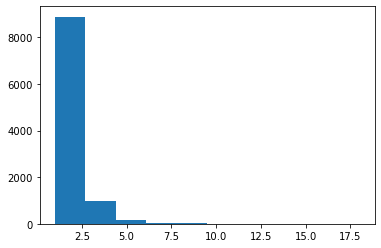

In [190]:
plt.hist(peaks.loc[peaks.mammal_level3]['nearest_gene_name'].value_counts())

In [191]:
peaks_use = peaks_use.loc[inter_use[7]]
dmrs_use = dmrs_use.loc[inter_use[3]]

In [192]:
peaks_use.shape

(281882, 67)

In [193]:
(peaks_use.level1_primate & dmrs_use.primate_level1.values).sum() / min(dmrs_use.primate_level1.sum(), peaks_use.level1_mammal.sum())

0.5384066508471201

In [194]:
(peaks_use.primate_level2.values & dmrs_use.primate_level2.values &~dmrs_use.mammal_level2).sum()/min(peaks_use.primate_level2.sum(), dmrs_use.primate_level2.sum())

0.24632921439030064

In [195]:
(peaks_use.primate_level3.values & dmrs_use.primate_level3.values).sum()/min(peaks_use.primate_level3.sum(), dmrs_use.primate_level3.values.sum())

0.26305148386165067

In [196]:
(peaks_use.level1_mammal & dmrs_use.mammal_level1.values).sum() / min(dmrs_use.mammal_level1.sum(),peaks_use.level1_mammal.sum())

0.6510628412126844

In [197]:
(peaks_use.mammal_level2.values & dmrs_use.mammal_level2.values).sum()/min(peaks_use.mammal_level2.sum(), dmrs_use.mammal_level2.values.sum())

0.6031245415872084

In [198]:
(peaks_use.mammal_level3.values & dmrs_use.mammal_level3.values).sum()/min(peaks_use.mammal_level3.sum(), dmrs_use.mammal_level3.values.sum())

0.39798949051862004

In [199]:
# use_vals_peaks = pd.DataFrame(index = peaks_use, data = np.peaks_use.values)

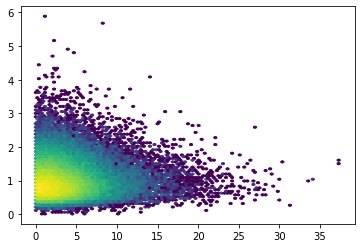

In [206]:
plt.hexbin(dmrs_use['diff'].abs(), peaks_use['divergence_idx'].abs(),  bins='log')

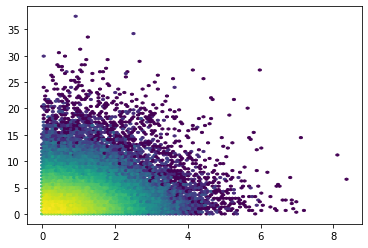

In [201]:
plt.hexbin(dmrs_use['diff_norate'].abs(), dmrs_use['diff'].abs(),  bins='log')

In [208]:
spearmanr(dmrs_use['diff_norate'].abs(), dmrs_use['diff'].abs(), nan_policy='omit')

SpearmanrResult(correlation=0.019663344122251333, pvalue=4.060731844968209e-09)

In [209]:
from scipy.stats import spearmanr

In [210]:
spearmanr(peaks_use['divergence_idx'].abs(), dmrs_use['diff'].abs(), nan_policy='omit')

SpearmanrResult(correlation=0.008788469777867377, pvalue=0.008218041199808082)

In [218]:
spearmanr(dmrs_use['conservation_idx'], peaks_use['conservation_idx'].abs(), nan_policy='omit')

SpearmanrResult(correlation=0.4292559090322232, pvalue=0.0)

In [136]:
y = dmrs_use['conservation_idx'].values.copy()
# y[y > 50] = np.abs(np.random.normal(np.sum(y>50))) * (-3) + 50

In [137]:
np.sum(y> 50)

126

In [138]:
 # np.abs(np.random.rand(np.sum(y==50))) * (-3) + 50

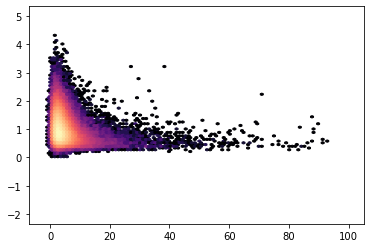

In [144]:
plt.hexbin( y, peaks_use['divergence_idx'], bins='log', extent=[-2, 100, -2, 5], cmap='magma')
# plt.ylim(0, 25)
# plt.xlim(0, .7)

In [141]:
spearmanr(peaks_use['divergence_idx'], y, nan_policy='omit')

SpearmanrResult(correlation=-0.242224893305868, pvalue=0.0)

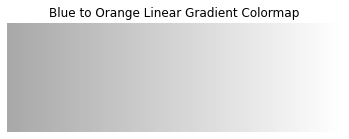

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colormap
cmap_name = 'darkgraywhite'
colors = [(0, "darkgray"), (1, "white")]
n_bins = 100  # Discretizes the interpolation into bins
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Test the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 2))
ax.set_title('Blue to Orange Linear Gradient Colormap')
ax.imshow(gradient, aspect='auto', cmap=cm)
ax.set_axis_off()
plt.show()

In [221]:
np.sum(dmrs_use.mammal_level3.values & peaks_use.mammal_level3.values)

1742

In [228]:
spearmanr(         dmrs_use['conservation_idx'],
    peaks_use['divergence_idx'], nan_policy='omit')

SpearmanrResult(correlation=-0.242224893305868, pvalue=0.0)

Text(0, 0.5, 'conservation score intersecting dmr')

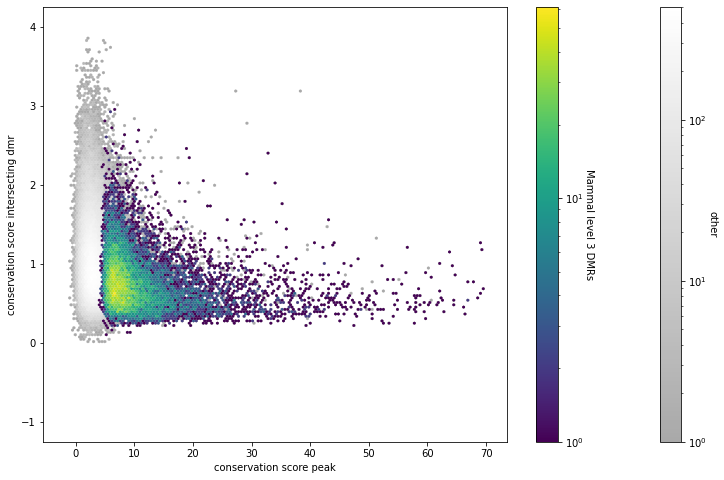

In [226]:
extent=[-2, 70, -1, 4]
fig, ax = plt.subplots(figsize=(13, 8))
im = ax.hexbin(
           dmrs_use['conservation_idx'],
    peaks_use['divergence_idx'],
           bins='log', extent=extent,
               cmap=cm, lw=.2, gridsize=150,
               rasterized=True
              )

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('other',
                       rotation=270,
                       labelpad=10)



im = ax.hexbin(
           dmrs_use.loc[dmrs_use.mammal_level3.values, 
                        'conservation_idx'],
    peaks_use.loc[dmrs_use.mammal_level3.values, 
                             'divergence_idx'],
               gridsize=150,
           # cmap='summer', 
                cmap='viridis',
               linewidths=0,
            bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent, rasterized=True
          )



cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('Mammal level 3 DMRs',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('conservation score peak')
ax.set_ylabel('conservation score intersecting dmr')
# plt.savefig("../figures/atac_vs_dmr_conservation.pdf", transparent=True, dpi=400) 

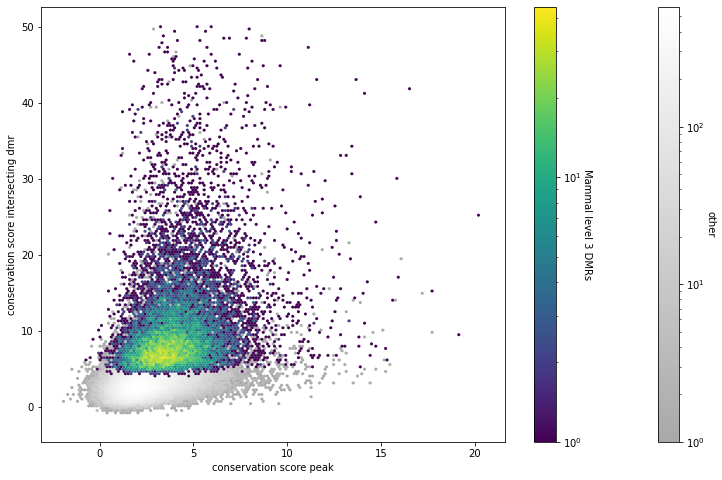

In [112]:
extent=[-2, 20.5, -2, 50]
fig, ax = plt.subplots(figsize=(13, 8))
im = ax.hexbin(peaks_use['conservation_idx'],
           dmrs_use['conservation_idx'],
           bins='log', extent=extent,
               cmap=cm, lw=.2, gridsize=150,
               rasterized=True
              )

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('other',
                       rotation=270,
                       labelpad=10)



im = ax.hexbin(peaks_use.loc[dmrs_use.mammal_level3.values, 
                             'conservation_idx'],
           dmrs_use.loc[dmrs_use.mammal_level3.values, 
                        'conservation_idx'],
               gridsize=150,
           # cmap='summer', 
                cmap='viridis',
               linewidths=0,
            bins='log',
               edgecolors='black', mincnt=1, 
           extent=extent, rasterized=True
          )



cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('Mammal level 3 DMRs',
                       rotation=270,
                       labelpad=10)
ax.set_xlabel('conservation score peak')
ax.set_ylabel('conservation score intersecting dmr')
plt.savefig("../figures/atac_vs_dmr_conservation.pdf", transparent=True, dpi=400) 

Text(0, 0.5, 'conservation score intersecting dmr')

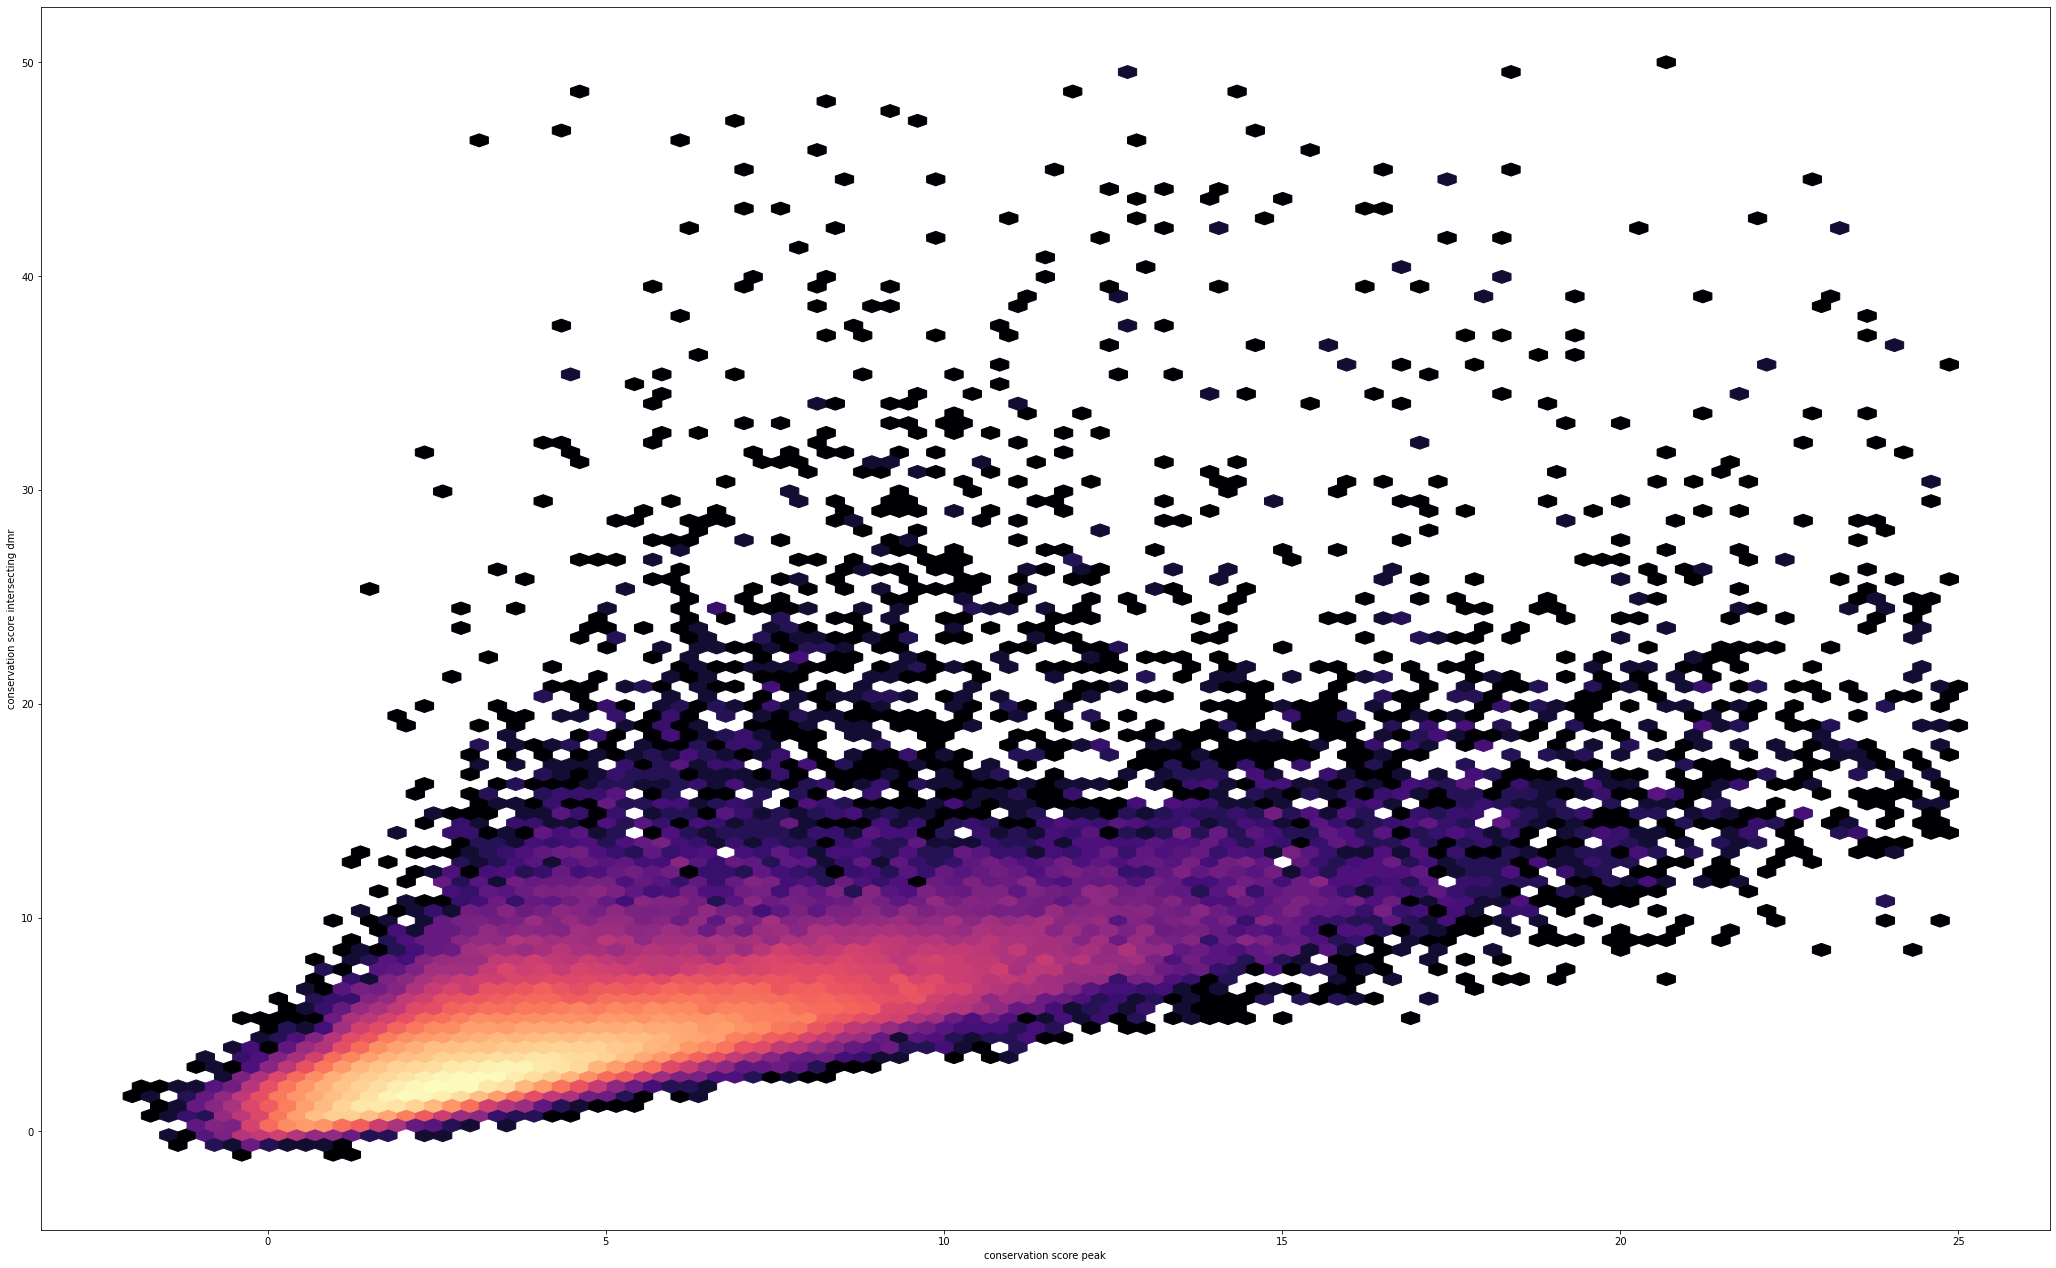

In [69]:
fig, ax = plt.subplots(figsize=(4*9, 2.5*9))
plt.hexbin(dmrs_use['conservation_idx_primate'],
           dmrs_use['conservation_idx'],
           bins='log', extent=[-2, 25, -2, 50], cmap='magma')
plt.xlabel('conservation score peak')
plt.ylabel('conservation score intersecting dmr')
# plt.ylim(0, 25)
# plt.xlim(0, .7)

In [61]:
shuffled = peaks_use['conservation_idx_primate'].values
# arr = np.arange(10)
np.random.shuffle(shuffled)

Text(0, 0.5, 'conservation score intersecting dmr')

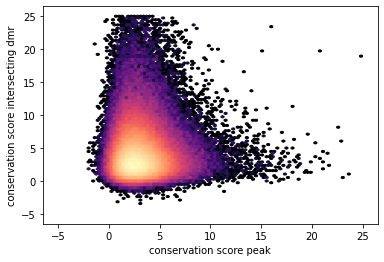

In [62]:
plt.hexbin(shuffled, dmrs_use['conservation_idx_primate'], bins='log', extent=[-5, 25, -5, 25], cmap='magma')
plt.xlabel('conservation score peak')
plt.ylabel('conservation score intersecting dmr')
# plt.ylim(0, 25)
# plt.xlim(0, .7)

In [65]:
from scipy.stats import pearsonr, spearmanr

In [66]:
spearmanr(peaks_use['conservation_idx_primate'], dmrs_use['conservation_idx_primate'])

SpearmanrResult(correlation=0.41297331726332726, pvalue=0.0)

In [68]:
spearmanr(peaks_use['conservation_idx'], dmrs_use['conservation_idx'], nan_policy='omit')

SpearmanrResult(correlation=0.42928295334083527, pvalue=0.0)

In [134]:
spearmanr(shuffled, dmrs_use['conservation_idx_primate'])

SpearmanrResult(correlation=-0.003159759835958314, pvalue=0.09342635436820558)

In [125]:
spearmanr(peaks_use['conservation_idx'], dmrs_use['conservation_idx'], nan_policy='omit')

SpearmanrResult(correlation=0.42928295334083527, pvalue=0.0)

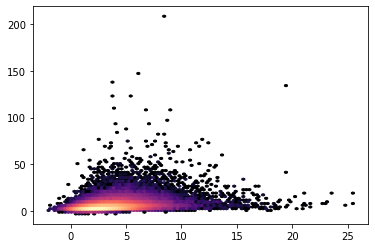

In [71]:
plt.hexbin(peaks_use['conservation_idx_primate'], dmrs_use['conservation_idx_primate'], bins='log',  cmap='magma')
# plt.ylim(0, 25)
# plt.xlim(0, .7)

In [46]:
from scipy.stats import spearmanr

In [47]:
spearmanr(peaks_use['conservation_idx_primate'], dmrs_use['conservation_idx_primate'])

SpearmanrResult(correlation=0.41297331726332726, pvalue=0.0)

In [ ]:
pair_check = 

In [ ]:
peaks_intersected = peaks_intersected.loc[

In [21]:
peaks.head()

,shortname,0,1,2,3,4,human_specific_sequence,mammal_level0,primate_level0,level1_macaque,...,mammal_level3,primate_level3,homer_annot,nearest_tss_dist,nearest_gene_name,simple_annot,conservation_idx,divergence_idx,conservation_idx_primate,divergence_idx_primate
0,chrX-154763146-154763645,chrX,154763146,154763645,VIP_peak_114413b,2.000056,False,False,False,False,...,False,False,CpG,532,DKC1,CpG,NaN,NaN,NaN,NaN
1,chr7-80334075-80334574,chr7,80334075,80334574,VIP_peak_99030c,2.000120,False,True,False,False,...,False,False,ERVL-B4-int|LTR|ERVL,40114,LOC101927269,ERVL,NaN,NaN,NaN,NaN
2,chr16-88340593-88341092,chr16,88340593,88341092,VIP_peak_42664,2.000145,False,False,False,False,...,False,False,Intergenic,-86628,ZNF469,Intergenic,NaN,NaN,NaN,NaN
3,chr14-99332084-99332583,chr14,99332084,99332583,L6_IT_CAR3_peak_27261,2.000176,True,False,False,False,...,False,False,Intergenic,-60137,BCL11B,Intergenic,NaN,NaN,NaN,NaN
4,chr11-4710143-4710642,chr11,4710143,4710642,PVALB_peak_18823,2.000194,False,True,False,False,...,False,False,Intergenic,-12540,OR51E2,Intergenic,NaN,NaN,NaN,NaN


In [49]:
peaks_summarized = peaks[['3', 'shortname', 
                          'mammal_level0', 'primate_level0',
                          'level1_mammal','level1_primate', 
                          'mammal_level2', 'primate_level2',
                          'mammal_level3', 'primate_level3',
                          'simple_annot', 'nearest_tss_dist', 'nearest_gene_name'
                         ]]

In [63]:
dmrs_summarized = dmrs[['3',
                    'mammal_level0', 'primate_level0', 
                    'mammal_level1', 'primate_level1',
                   'mammal_level2','primate_level2',
                    'mammal_level3', 'primate_level3',
                    'simple_annot', 'tss_dist', 'nearest_gene_tss',
                    'hyper_not_hypo_mammal', 'hyper_not_hypo_primate'
                   ]]

In [54]:
intersected.head()

,0,1,2,3,4,5,6,7,8
0,chr1,184163,184273,human_orig_12,chr1,183723,184222,VIP_peak_411,59
1,chr1,190757,191223,human_orig_14,chr1,191205,191704,OPC_peak_282c,18
2,chr1,191264,191307,human_orig_15,chr1,191205,191704,OPC_peak_282c,43
3,chr1,191438,191806,human_orig_16,chr1,191205,191704,OPC_peak_282c,266
4,chr1,779651,780130,human_orig_48,chr1,779346,779845,L5_6_NP_peak_138,194


In [56]:
check_peaks = peaks_summarized.loc[peaks_summarized['3'].isin(intersected[7])]

In [57]:
check_peaks.shape

(282602, 13)

In [58]:
peaks.shape

(384412, 65)

In [64]:
check_dmrs = dmrs_summarized.loc[dmrs_summarized['3'].isin(intersected[3])]

In [65]:
check_dmrs.shape

(347304, 14)

In [34]:
check_peaks.shape[0]/peaks.shape[0]

NameError: name 'check_peaks' is not defined

In [67]:
check_dmrs.shape[0]/dmrs.shape[0]

0.255003458256422

In [71]:
check_peaks.mammal_level0.sum()/peaks.mammal_level0.sum()

0.7533583912616522

In [72]:
check_dmrs.mammal_level0.sum()/dmrs.mammal_level0.sum()

0.3235243322406939

In [73]:
check_peaks.primate_level0.sum()/peaks.primate_level0.sum()

0.7398797688579595

In [74]:
check_dmrs.primate_level0.sum()/dmrs.primate_level0.sum()

0.22953050884001724

In [75]:
check_peaks.level1_mammal.sum()/peaks.level1_mammal.sum()

0.6785912160644495

In [76]:
check_peaks.level1_primate.sum()/peaks.level1_primate.sum()

0.8107246137321326

In [77]:
check_peaks.mammal_level2.sum()/peaks.mammal_level2.sum()

0.6265518785362478

In [78]:
check_peaks.primate_level2.sum()/peaks.primate_level2.sum()

0.7088082109793834

In [79]:
check_peaks.mammal_level3.sum()/peaks.mammal_level3.sum()

0.22336320637291512

In [80]:
check_peaks.primate_level3.sum()/peaks.primate_level3.sum()

0.7407069416560199

In [81]:
check_dmrs.mammal_level3.sum()/dmrs.mammal_level3.sum()

0.5493294610062356

In [82]:
check_dmrs.primate_level3.sum()/dmrs.primate_level3.sum()

0.4301350213601921

In [83]:
check_dmrs.mammal_level3.shape

(347304,)

In [85]:
m_l3_dmr = check_dmrs.loc[check_dmrs.mammal_level3]['3']

In [86]:
p_l3_dmr = check_dmrs.loc[check_dmrs.primate_level3]['3']

In [87]:
intersected[3]

0              human_orig_12
1              human_orig_14
2              human_orig_15
3              human_orig_16
4              human_orig_48
                 ...        
364929    human_orig_1361907
364930    human_orig_1361922
364931    human_orig_1361947
364932    human_orig_1361948
364933    human_orig_1361955
Name: 3, Length: 364934, dtype: object

In [91]:
overlap_dmrs  = check_peaks.loc[check_peaks.mammal_level3]['3']

In [92]:
check_dmr_overlaps = intersected.loc[intersected[7].isin(overlap_dmrs)]

In [94]:
check_dmr_overlaps.shape

(4516, 9)

In [95]:
overlap_dmrs.shape

(3589,)

In [97]:
check_dmrs = check_dmrs.set_index('3')

In [100]:
check_dmrs.shape

(347304, 13)

In [104]:
check_dmrs.index.isin(intersected[3]).sum()

347304

In [104]:
check_dmrs.index.isin(intersected[3]).sum()

347304

In [105]:
l3_overlap_dmrs = check_dmrs.loc[check_dmr_overlaps[3].values]

In [108]:
l3_overlap_dmrs.mammal_level3.sum()

1748

In [109]:
l3_overlap_dmrs.mammal_level1.sum()

1254

In [114]:
l3_overlap_dmrs.primate_level3.sum()

895

In [116]:
1738/3589

0.4842574533296183

In [117]:
895/3589

0.24937308442463083

In [119]:
check_dmrs.loc[check_dmrs.mammal_level3]

,mammal_level0,primate_level0,mammal_level1,primate_level1,mammal_level2,primate_level2,mammal_level3,primate_level3,simple_annot,tss_dist,nearest_gene_tss,hyper_not_hypo_mammal,hyper_not_hypo_primate
3,,,,,,,,,,,,,
human_orig_210,True,False,False,True,False,False,True,False,intron,1122,AGRN,False,False
human_orig_229,True,False,True,False,True,True,True,False,exon,361,AGRN,False,False
human_orig_457,True,False,False,False,False,False,True,False,promoter,-494,SNORD167,False,False
human_orig_679,True,False,False,False,False,False,True,False,promoter,-331,LOC105378586,False,False
human_orig_980,True,False,True,False,True,True,True,False,exon,35122,CFAP74,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_orig_1356177,True,False,False,False,False,False,True,False,promoter,-507,DUSP9,False,False
human_orig_1356178,True,False,False,False,False,False,True,False,intron,2245,DUSP9,False,False
human_orig_1356206,True,False,False,False,False,False,True,False,intron,237,SLC6A8,False,False


In [121]:
dmrs.mammal_level3.sum()

23414

In [125]:
overlap_peaks = intersected.loc[intersected[3].isin(check_dmrs.loc[check_dmrs.mammal_level3].index)]
overlap_peaks.head()

,0,1,2,3,4,5,6,7,8
50,chr1,1020932,1021551,human_orig_210,chr1,1020654,1021153,L4_5_IT_peak_663c,221
57,chr1,1033917,1034791,human_orig_229,chr1,1034031,1034530,L6b_peak_258b,499
128,chr1,1303332,1307279,human_orig_457,chr1,1304654,1305153,OPC_peak_363,499
176,chr1,1598649,1599555,human_orig_679,chr1,1599306,1599805,SNCG_peak_308a,249
276,chr1,1968266,1969062,human_orig_980,chr1,1968884,1969383,SNCG_peak_330,178


In [127]:
overlap_peaks.shape, overlap_peaks[7].unique().shape

((14135, 9), (13431,))

In [135]:
peak_l3_dmrs = check_peaks.loc[check_peaks['3'].isin(overlap_peaks[7])]

In [137]:
print(peak_l3_dmrs.shape)
peak_l3_dmrs.head()

(13431, 13)


,3,shortname,mammal_level0,primate_level0,level1_mammal,level1_primate,mammal_level2,primate_level2,mammal_level3,primate_level3,simple_annot,nearest_tss_dist,nearest_gene_name
78,LAMP5_peak_78718,chr6-88377941-88378440,True,False,False,False,False,False,False,False,Intergenic,161178,LOC101928936
100,LAMP5_peak_2795d,chr1-39672624-39673123,True,False,True,False,False,False,False,True,promoter,-836,NT5C1A
127,L2_3_IT_peak_30920c,chr11-63762325-63762824,True,False,True,False,True,True,False,True,exon,6200,C11orf95
168,ASC_peak_22357d,chr12-81078698-81079197,True,False,False,False,False,False,False,False,intron,869,ACSS3
220,ASC_peak_4475a,chr1-85452631-85453130,True,False,False,False,False,False,False,False,intron,12278,DDAH1


In [139]:
peak_l3_dmrs.mammal_level3.sum()

1637

In [140]:
peak_l3_dmrs.primate_level3.sum()

4283

In [147]:
peak_l3_dmrs.level1_mammal.sum(), peak_l3_dmrs.mammal_level2.sum(), peak_l3_dmrs.mammal_level3.sum()

(8261, 6844, 1637)

In [ ]:
check_dmrs

In [102]:
check_dmr_overlaps[3]

128           human_orig_457
176           human_orig_679
317          human_orig_1082
318          human_orig_1083
319          human_orig_1083
                 ...        
363817    human_orig_1351144
364171    human_orig_1354942
364423    human_orig_1356206
364530    human_orig_1356577
364550    human_orig_1356626
Name: 3, Length: 4516, dtype: object